**Question 5 -**

Write a program to download the data from the given API link and then extract the following data with
proper formatting

**Link -** http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

**Note -** Write proper code comments wherever needed for the code understanding

**Sample Data -**

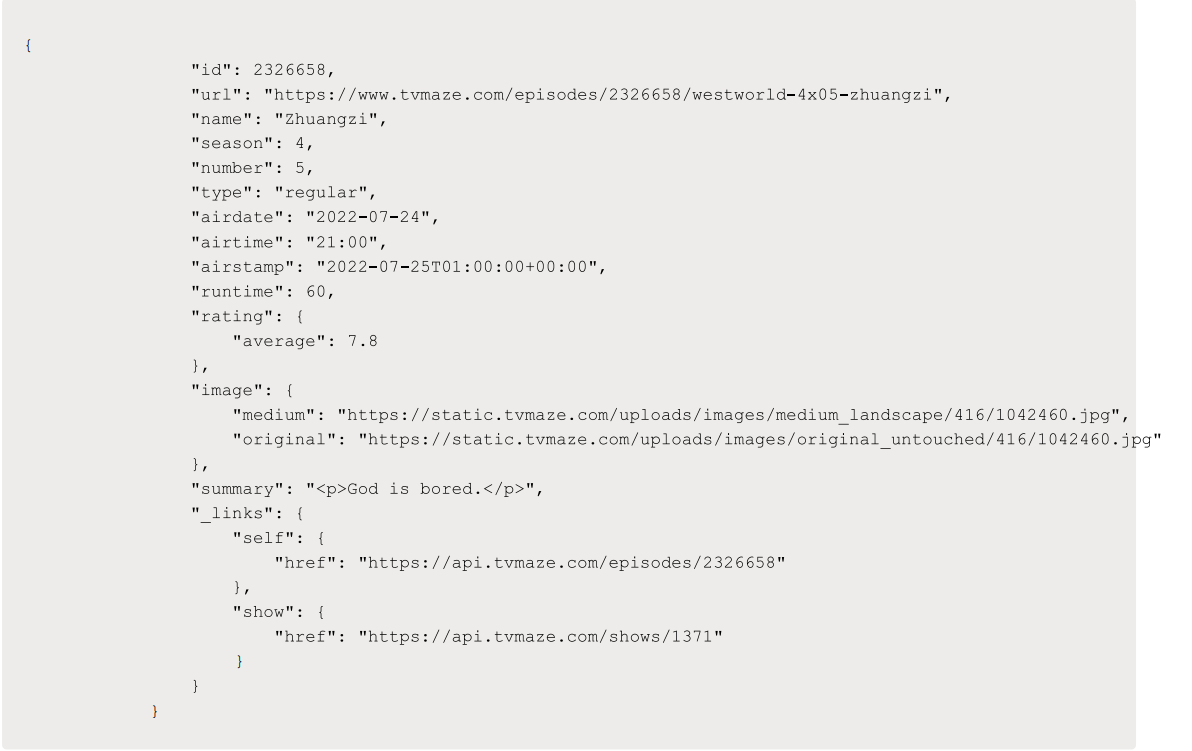

**Excepted Output Data Attributes -**

● id - int url - string

● name - string season

● - int number - int

● type - string airdate -

● date format airtime -

● 12-hour time format

● runtime - float

● average rating - float

● summary - string

● without html tags

● medium image link - string

● Original image link - string

In [1]:
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json

In [2]:
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = json.loads(response.text)

In [3]:
df=pd.DataFrame(data['_embedded']['episodes'])
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        36 non-null     int64 
 1   url       36 non-null     object
 2   name      36 non-null     object
 3   season    36 non-null     int64 
 4   number    36 non-null     int64 
 5   type      36 non-null     object
 6   airdate   36 non-null     object
 7   airtime   36 non-null     object
 8   airstamp  36 non-null     object
 9   runtime   36 non-null     int64 
 10  rating    36 non-null     object
 11  image     36 non-null     object
 12  summary   36 non-null     object
 13  _links    36 non-null     object
dtypes: int64(4), object(10)
memory usage: 4.1+ KB


In [5]:
df[['medium image link', 'original image link']] = df['image'].apply(pd.Series)

In [6]:
drop_lst=['image','_links','airstamp']

df.drop(drop_lst,axis =1,inplace=True)

In [7]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [8]:
df['summary']= df['summary'].apply(remove_html_tags)

In [9]:
df[['rating']] = df['rating'].apply(pd.Series)
df = df.rename(columns={'rating': 'average rating'})

In [10]:
def convert_to_12_hour(time):
    datetime_object = datetime.strptime(time, "%H:%M")
    return datetime_object.strftime("%I:%M %p")

In [11]:
df['airtime'] = df['airtime'].apply(convert_to_12_hour)

In [12]:
df['airdate'] = pd.to_datetime(df['airdate'])
df["runtime"]=df['runtime'].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   36 non-null     int64         
 1   url                  36 non-null     object        
 2   name                 36 non-null     object        
 3   season               36 non-null     int64         
 4   number               36 non-null     int64         
 5   type                 36 non-null     object        
 6   airdate              36 non-null     datetime64[ns]
 7   airtime              36 non-null     object        
 8   runtime              36 non-null     float64       
 9   average rating       36 non-null     float64       
 10  summary              36 non-null     object        
 11  medium image link    36 non-null     object        
 12  original image link  36 non-null     object        
dtypes: datetime64[ns](1), float64(2), int

In [14]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [15]:
df.to_csv("westworld.csv",index = False)